#### dataset https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index#

#### lab instructions: 
"This week, let's do a "full" analysis project.

Find an "interesting" data set to work with. UCI Machine Learning Archive is a good place to start.
After reading the data set's description and looking at the data, propose an "Analysis Question" -- In other words, what is all of your work trying to prove?
Clean the data as we have been
Missing values
Data types
String manipulation
Wide vs. long format
etc.
Do feature analysis using Seaborn and Matplotlib to determine which ones are important.
Remember to explain your steps. Why are you doing the graph and what did you learn from it?
Use a linear model from this weeks' reading. Be sure to split the data into train and test sets.
Perform checks on the model's output of the test data. Evaluate accuracy of the model.
Final analysis of the results:
What was the answer to your Analysis Question?
How accurate was the model?
Thoughts to improve accuracy?
Lessons learned.
Deliverable will be the Jupyter notebook and data set."

### About the Dataset:
I found this dataset to be intersting personally, as I am naturally curious about market finance, and this was the most detailed dataset about stocks specifically. The data is from: Dr. Michael Brown, michael.brown '@' umuc.edu, University of Maryland University College.


"In predicting stock prices you collect data over some period of time - day, week, month, etc. But you cannot take advantage of data from a time period until the next increment of the time period. For example, assume you collect data daily. When Monday is over you have all of the data for that day. However you can invest on Monday, because you don't get the data until the end of the day. You can use the data from Monday to invest on Tuesday.

In our research each record (row) is data for a week. Each record also has the percentage of return that stock has in the following week (percent_change_next_weeks_price). Ideally, you want to determine which stock will produce the greatest rate of return in the following week. This can help you train and test your algorithm.

Some of these attributes might not be use used in your research. They were originally added to our database to perform calculations. (Brown, Pelosi & Dirska, 2013) used percent_change_price, percent_change_volume_over_last_wk, days_to_next_dividend, and percent_return_next_dividend. We left the other attributes in the dataset in case you wanted to use any of them. Of course what you want to maximize is percent_change_next_weeks_price.

Training data vs Test data:
In (Brown, Pelosi & Dirska, 2013) we used quarter 1 (Jan-Mar) data for training and quarter 2 (Apr-Jun) data for testing.

Interesting data points:
If you use quarter 2 data for testing, you will notice something interesting in the week ending 5/27/2011 every Dow Jones Index stock lost money"

## "Analysis_Question"-- In other words, what is all of your work trying to prove?
The purpose of this lab is to use models to look for relationships between observed features and their outcomes. Based on the content of the dataset, it would be intersting to see if there is any sort of correlation between some cruicial variables in this dataset. At first glance, this is a pretty basic dataset, but after running the dataset through some of the methods we will demonstrate, we will look to find unique observations in the dataset. We will look to aggregate some information by unique stock, look to find correlation in the dataset that could lead to uniique understanding or deeper analysis, and also we will hope to uncover information that could possibly lead to future understandings/correlations by training data and test sets to look for unique inear regression models. Potentially we will discover something groundbreaking and will lead to learning events from the past that can elude to future events occuring? We will see! We will primarily look at volume and it's affect on other variables. 

### Importing the dataset and seperating by ','

In [1]:
#here are packages we will import and use. there will adidtionally be others as we go in more detail later on.
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dow_jones_index.data', sep=',')
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


## Clean the data as we have been
### missing values

In [3]:
#We see 2 columns with 30 vlaues as null. we will investigate this further
null_vec = pd.isnull(df)
null_count = np.sum(null_vec)
null_count

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [4]:
# we see the same results from a differnt test 
df.isna().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

### data types

In [5]:
#checking data types -- we will change the date column next to be a better fit with datetimem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

### string manipulation

In [6]:
# changing the data type on the 'date' column
df['date'] = pd.to_datetime(df['date'])
df.info()
#we see we changed the data type for date column - this will help with analysis later on
#we now have the data cleaned and can move on for further analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    object        
 4   high                                750 non-null    object        
 5   low                                 750 non-null    object        
 6   close                               750 non-null    object        
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

## Do feature analysis using Seaborn and Matplotlib to determine which ones are important.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns
sns.set()               # Makes graphs prettier         

"Seaborn has a `scatterplot()` function and also a `relplot()` function that "relates" two variables. The `relplot()` default is to use a scatterplot:"

In [9]:
type(df)

pandas.core.frame.DataFrame

Pair plots
Pair plots are useful for seeing relationships between variables by plotting all pairs of variables against each other:

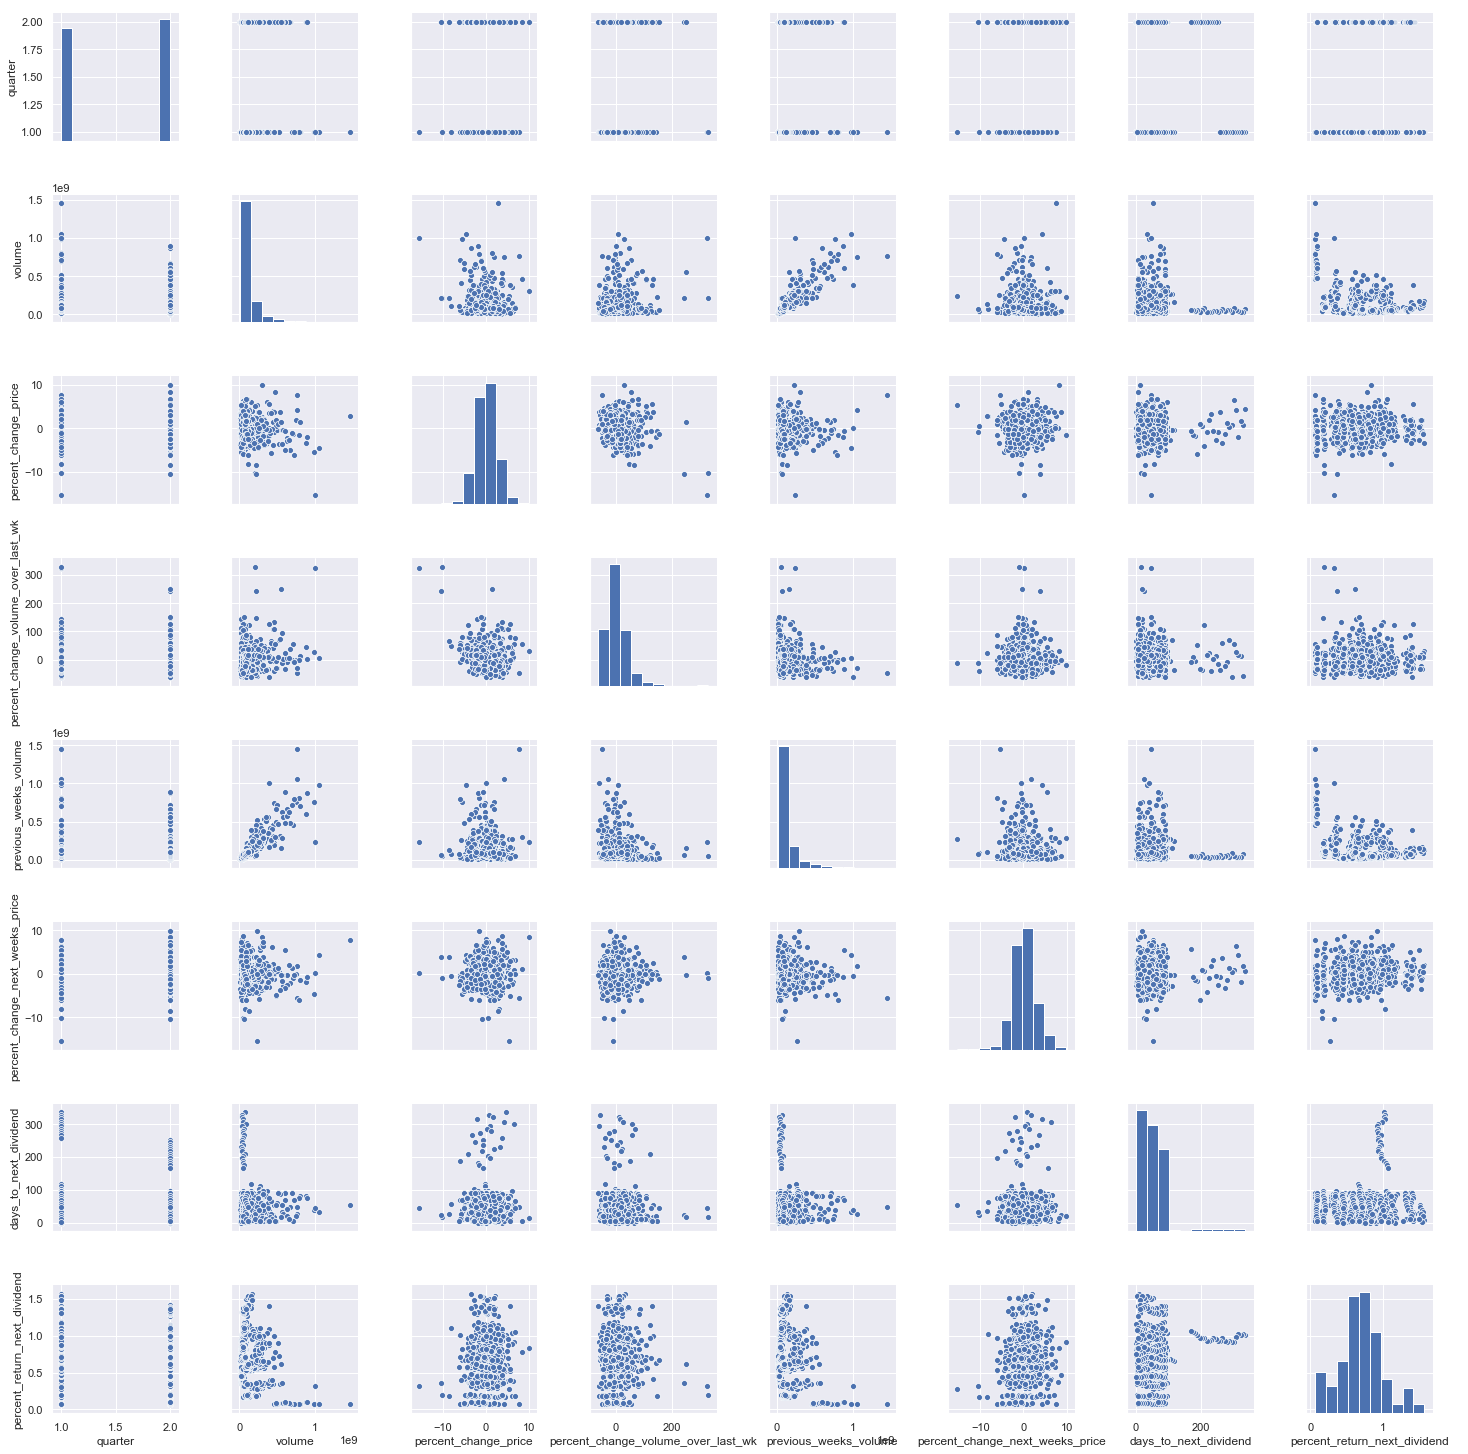

In [10]:
sns.pairplot(df)
#we see lots of useful plots below:

Factor Plots
Factor plots allow you to view the distribution of one variable in bins determined by another variable.

Doing feature analysis using Seaborn&Matplotlib can help show unique perspective in the data, particulary by comparing one variable directly to another variable directly, as we see in the output produced above. This can be used to help model relationships 

## linear model from this weeks' reading. Be sure to split the data into train and test sets.
"First of all, why do I keep using this word, "model?" A model is a mathematical relationship between the observed features and the outcome. Ultimately, we want to be able to feed any set of unlabeled, unanalyzed feature data into our model and get an accurate prediction of the outcome."

In [11]:
#training the dataset
train = pd.read_csv("dow_jones_index.data", sep=',')
train.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [12]:
train.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


We will focus on volume, as that is a large indicator of stock's capitilzation and dependent on stock price changes

In [13]:
train['volume'].describe()
# we see no missing values and all vlaues positive

count    7.500000e+02
mean     1.175478e+08
std      1.584381e+08
min      9.718851e+06
25%      3.086624e+07
50%      5.306088e+07
75%      1.327218e+08
max      1.453439e+09
Name: volume, dtype: float64

Skewness: 3.223404827784203
Kurtosis: 14.197634570087917


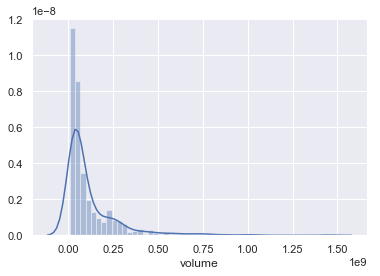

In [14]:
print(f'Skewness: {train["volume"].skew()}')
print(f'Kurtosis: {train["volume"].kurt()}')

sns.distplot(train['volume']);
# we see non-normal distribution

### Correlation Matrix and Heatmap

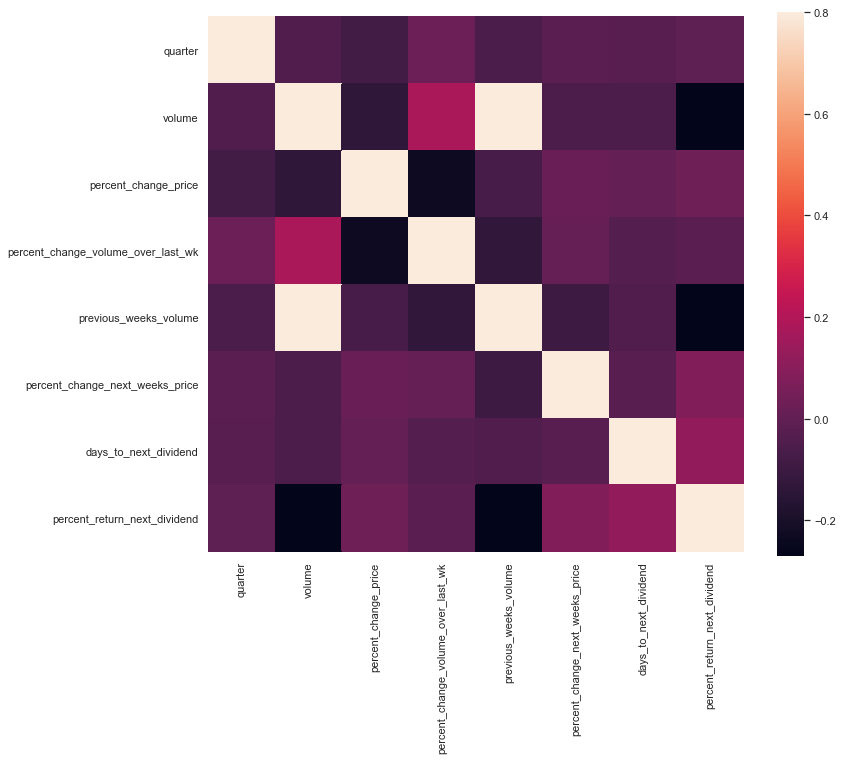

In [15]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True)
# this is an extremely useful chart for comparing variables and their correlations

<function matplotlib.pyplot.show(*args, **kw)>

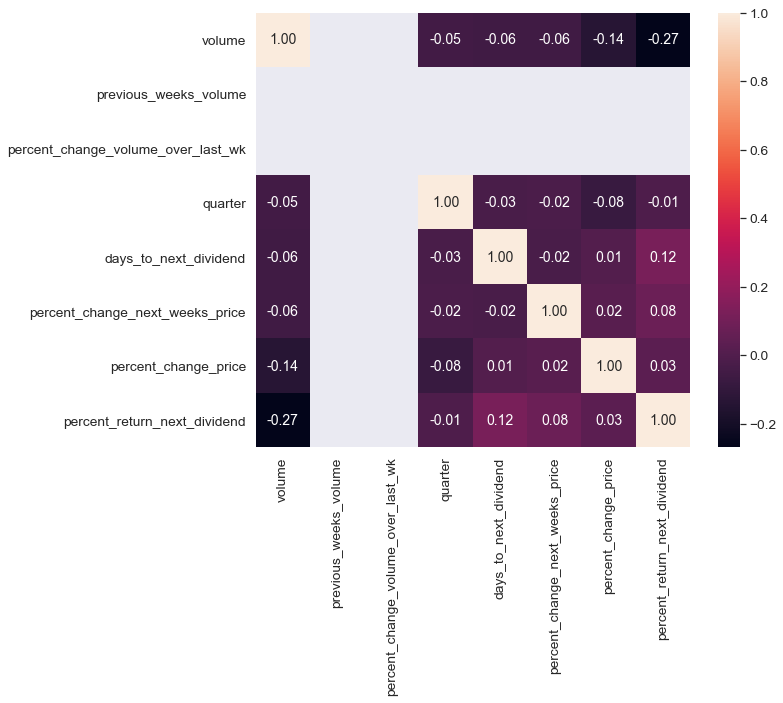

In [16]:
# SalePrice correlation matrix
k = 10 # number of vars for heatmap
cols = corrmat.nlargest(k, 'volume')['volume'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show
# this is an extremely useful chart for comparing variables and their correlations with the numbers in the chart for easier viewing

D:\ananconda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


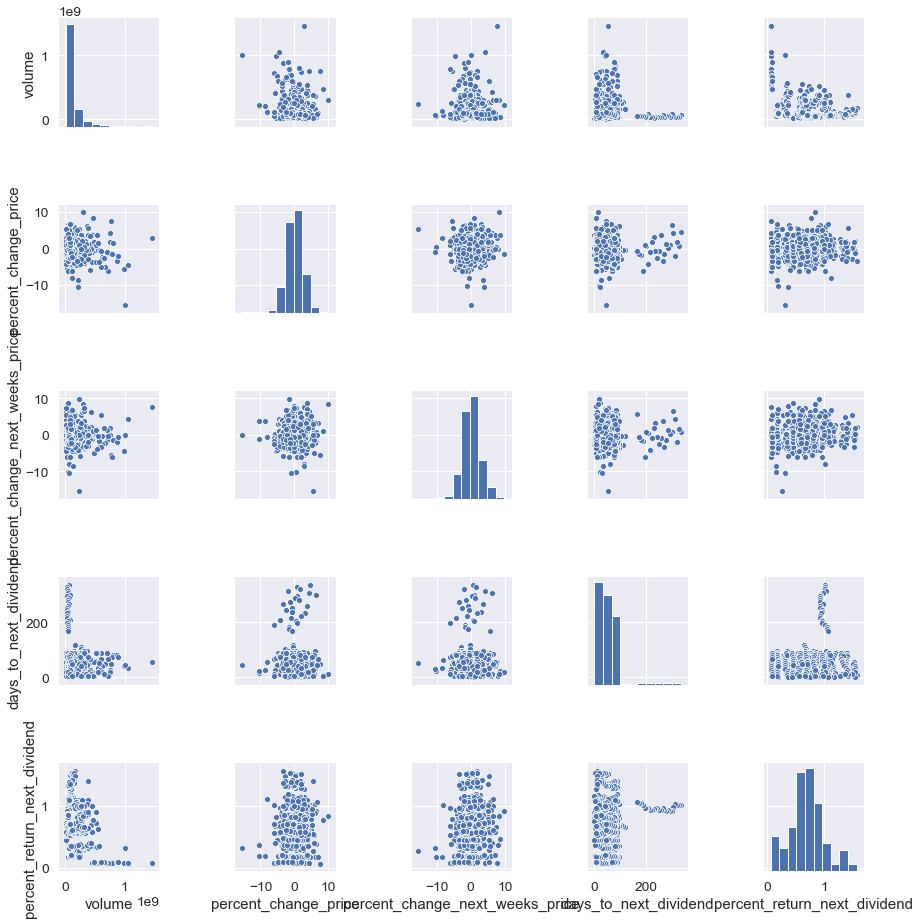

In [17]:
#Here is another seaborn plot, but with traingin data this time. 
cols = ['stock', 'volume', 'percent_change_price', 'percent_change_next_weeks_price', 'days_to_next_dividend', 'percent_return_next_dividend']
sns.pairplot(train[cols], size = 2.5)
plt.show();

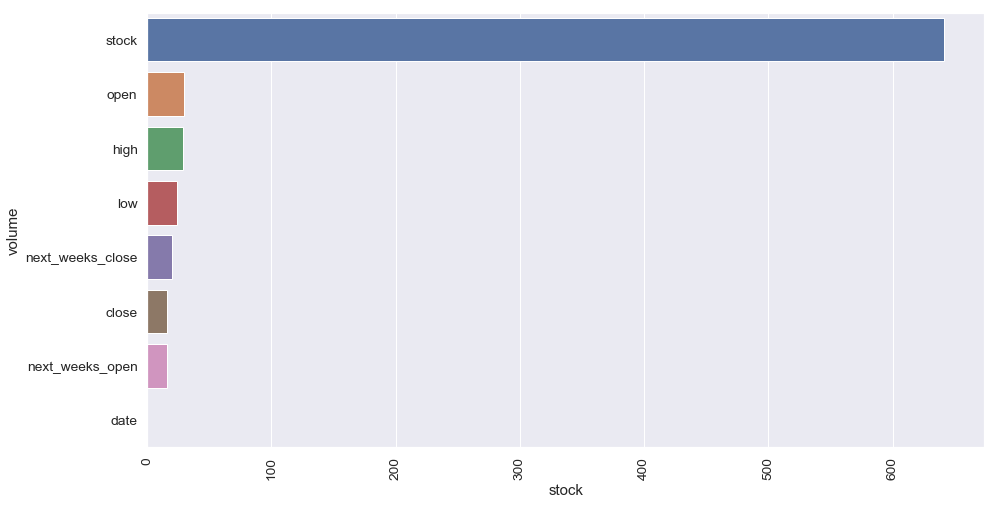

In [18]:
#here is a cool visual of how volume affects each variable
import scipy.stats as stats

qualitative = [f for f in train.columns if train.dtypes[f] == 'object'] # List comprehension

def anova(frame):
    anv = pd.DataFrame()
    anv['volume'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['volume'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['stock'] = np.log(1./a['pval'].values)

plt.figure(figsize=(15,8)) # Set plot size so it is readable!

sns.barplot(data=a, x='stock', y='volume')
x=plt.xticks(rotation=90)

In [19]:
#training qualitative
train[qualitative][:5]

,stock,date,open,high,low,close,next_weeks_open,next_weeks_close
0,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,$16.71,$15.97
1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,$16.19,$15.79
2,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,$15.87,$16.13
3,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,$16.18,$17.14
4,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,$17.33,$17.37


In [20]:
#encoding by mean
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['stock'] = frame[[feature, 'stock']].groupby(feature).mean()['volume']
    ordering = ordering.sort_values('stock')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

In [21]:
#training by groupby and 'mean' by each unique stock ticker. This is a nice aggregate view
train[["stock", 'volume']].groupby("stock").mean()['volume']

stock
AA      1.296388e+08
AXP     3.520848e+07
BA      2.378142e+07
BAC     7.229991e+08
CAT     3.373112e+07
CSCO    3.586616e+08
CVX     3.857983e+07
DD      2.911666e+07
DIS     4.744367e+07
GE      2.639381e+08
HD      4.820505e+07
HPQ     9.485843e+07
IBM     2.473918e+07
INTC    2.990224e+08
JNJ     5.600611e+07
JPM     1.511090e+08
KO      3.855617e+07
KRFT    4.481617e+07
MCD     3.215170e+07
MMM     1.571965e+07
MRK     7.677384e+07
MSFT    2.896988e+08
PFE     2.274670e+08
PG      4.865309e+07
T       1.322873e+08
TRV     1.715718e+07
UTX     1.831807e+07
VZ      7.838518e+07
WMT     5.572143e+07
XOM     9.368949e+07
Name: volume, dtype: float64

In [22]:
## And another way to look at missing values (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
#we see only 30 missing vlaues in 'previous_weeks_volume	' & 'previous_weeks_volume	' at only .04%,  with no adidtional missing values

,Total,Percent
previous_weeks_volume,30,0.04
percent_change_volume_over_last_wk,30,0.04
percent_return_next_dividend,0,0.00
days_to_next_dividend,0,0.00
percent_change_next_weeks_price,0,0.00
next_weeks_close,0,0.00
next_weeks_open,0,0.00
percent_change_price,0,0.00
volume,0,0.00
close,0,0.00


In [23]:
train.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


### Testing for Normality/ Linear Regression

In [24]:
from scipy.stats import norm

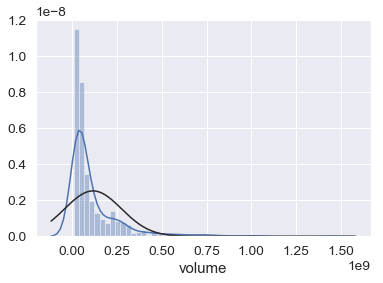

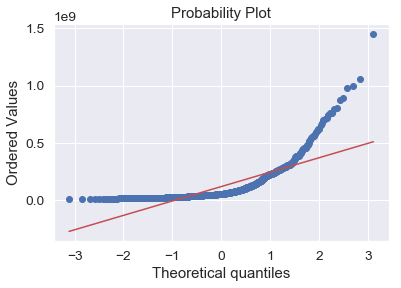

In [25]:
#histogram and normal probability plot. this is not normally distributed, nor linear. 
sns.distplot(train['volume'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['volume'], plot=plt)

In [26]:
#transform
#data transformation
train['volume'] = np.log(train['volume'])
#this is normally distributed

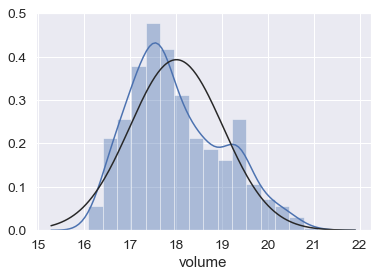

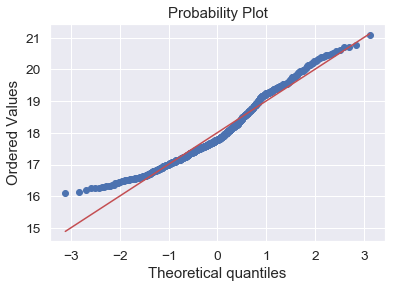

In [27]:
#transformed histogram and normal probability plot, and semi linear. this is S-shaped, meaning it is positive slope
sns.distplot(train['volume'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['volume'], plot=plt)

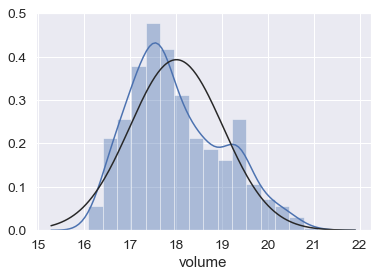

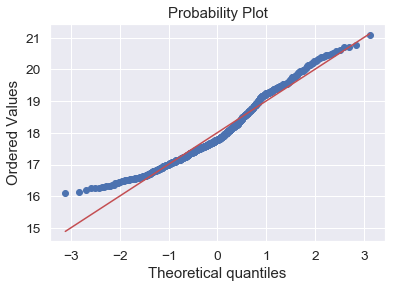

In [28]:
#histogram and normal probability plot. this is S-shaped, meaning it is positive slope
sns.distplot(train['volume'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['volume'], plot=plt)
#this is normally distributed, and relatively linear

In [29]:
#data transformation
train['volume'] = np.log(train['volume'])

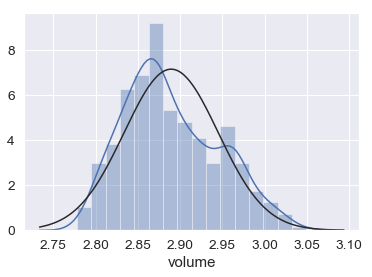

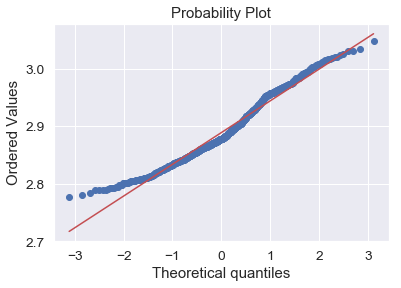

In [30]:
#transformed histogram and normal probability plot
sns.distplot(train['volume'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['volume'], plot=plt)

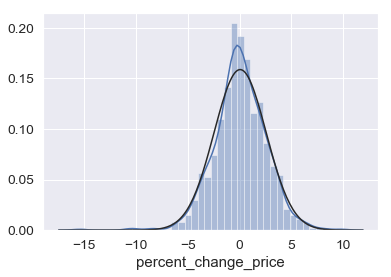

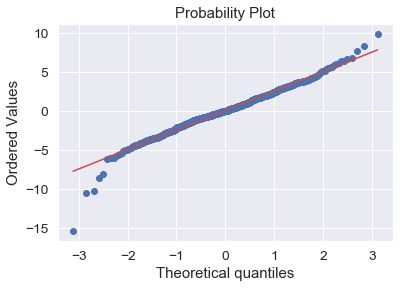

In [31]:
#histogram and normal probability plot. this is S-shaped, meaning it is positive slope
sns.distplot(train['percent_change_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['percent_change_price'], plot=plt)

In [32]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['volume'] = pd.Series(len(train['percent_change_price']), index=train.index)
train['volume'] = 0 
train.loc[train['percent_change_price']>0,'volume'] = 1

In [33]:
#transform data
train.loc[train['volume']==1,'percent_change_price'] = np.log(train['percent_change_price'])

D:\ananconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\ananconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


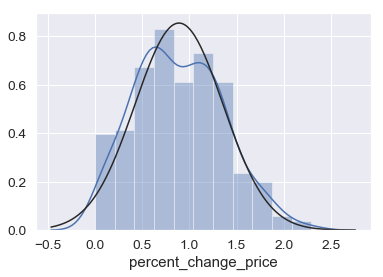

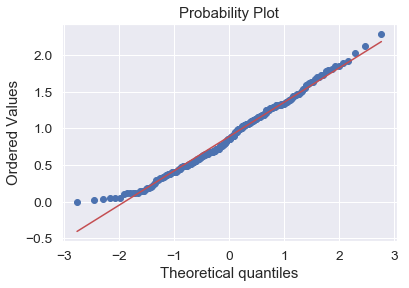

In [34]:
#histogram and normal probability plot
sns.distplot(train[train['percent_change_price']>0]['percent_change_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['percent_change_price']>0]['percent_change_price'], plot=plt)

In [35]:
# cols was used to make pairplots of the quantitative features.
# We can use that to create a new dataset for our regression
cols

['stock',
 'volume',
 'percent_change_price',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

In [36]:
# X is traditionally used to identify the data to be modeled
X_train = train[cols[1:]]
X_train.head()

,volume,percent_change_price,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,1.333070,-4.428490,26,0.182704
1,0,-4.428490,-2.470660,19,0.187852
2,0,-2.470660,1.638310,12,0.189994
3,1,0.493665,5.933250,5,0.185989
4,1,1.780572,0.230814,97,0.175029


In [37]:
# y is traditionally the result
y_train = train['percent_change_price']

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
pred = reg.predict(X_train)

In [42]:
print(f'Mean squared error: {mean_squared_error(y_train, pred)}')


Mean squared error: 4.734659234676977e-30


In [43]:
print(f'r2 score (1 is perfect): {r2_score(y_train, pred)}')
# we see 'percent_change_price' has perfect correlation (obviously!), that makes sense, and makes our training model correct-- lets try some other variables 

r2 score (1 is perfect): 1.0


In [44]:
#Now, lets look to test the correlation between change in next weeks price and volume
y_train1 = train['percent_change_next_weeks_price']

In [45]:
# making new variables to see correlation -- here is 'percent_change_next_weeks_price' -- this is not super close to 0!
print(f'Mean squared error: {mean_squared_error(y_train1, pred)}')

Mean squared error: 11.243286579326945


In [46]:
# 'percent_change_next_weeks_price' --  we se this is not super correlated, but has some significance
print(f'r2 score (1 is perfect): {r2_score(y_train1, pred)}')
#we see moderately related correlation between 'percent_change_next_weeks_price' 

r2 score (1 is perfect): -0.5680242428634954


## Final analysis of the results:

#### What was the answer to your Analysis Question?
We were able to succesfully find correlation between volume and the other variables in the dataset. By using various functions and models, we learned a ton about this data. Volume is correlated to a significant amount of variabels, but of course in various degrees. Percent_change_price is relately correlated to volume as well .Next weeks price is directly related to volume, obviously! Percent_change_next_weeks_price is moederately related to volume. We we able to identify the correlation bewteen each variable to another in using seaborn plots. Using linear models helped to demonstrate the relationship and likeiness of the variables potentially having predicatable measure for the future.


#### How accurate was the model?

The models appeared relatively accurate in comparison to the variables. Although the models were seemingingly accurate, that does not mean that we can conclusively say that we found any significant trends in the data that lead to an 'outbreak' in analysis. Most were predictable for those familiar with financial markets, as they should know what each variables have affect on another(hopefully). 

#### Thoughts to improve accuracy?

To improve, it would be necessary to have significantly more data. This was not a huge dataset. To improve for more significant results, we could have had much more data and also worked on treating missing values as outlier values. We could possibly have more selection, feature selection, multiple algorithms, algorithm tuning (random forest), esemble methods (bagging boosting), cross validation, and potentially just tweaked the algorithm used better. https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/


#### Lessons learned.

In conclusion, it was fun to perform this type of analysis. I learned that if I had more data, I would be able to improve my results in terms of greater correlation and significance. I learned that financial varibales in this dataset have significance and correlation to another. I learned that: Volume is correlated to a significant amount of variabels(but of course in various degrees), Percent_change_price is relately correlated to volume as well, Next weeks price is directly related to volume, (obviously), Percent_change_next_weeks_price is moederately related to volume. There were many lessons learned, and I hope to take them forward to better my analysis skills in the future!

### References:
BIERLY, M. (2016, June 8). 10 Useful Python Data Visualization Libraries for Any Discipline. In Mode Blog. Retrieved from https://mode.com/blog/python-data-visualization-libraries/.

Pico, . (2020). Difference between Linear Regression and Logistic Regression. In Pico Quantitative Trading LLC. Retrieved from https://www.pico.net/kb/difference-between-linear-regression-and-logistic-regression.

swarnalisantra, . (n.d.). ML | Linear Regression vs Logistic Regression. In Geeks for Geeks. Retrieved from https://www.geeksforgeeks.org/ml-linear-regression-vs-logistic-regression/.

The Python Graph Gallery, . (2017). The python graph gallery . In The Python Graph Gallery. Retrieved from https://python-graph-gallery.com/.
